In [1015]:
print("Analyse Bourse")


Analyse Bourse


# Let's go learning PYTHON !

In [1016]:
# Ceci est un commentaire dans la cellule de code 
# Python est de la programmation OBJET. On définit des variables. 
name = "Corentin"

print(name)


Corentin


In [1017]:
name
# si on appelle la variable alors on voit son type.

'Corentin'

In [1018]:
# Pour les chiffres on a 
# LES ENTIERS NATURELS
age = 24
print(age)

24


In [1019]:
# Pour les chiffres à virgule on parle de FLOATS
pi = 3.14159
pi

3.14159

In [1020]:
name = 'Imen'
#Titouan c'est du texte == STRING

In [1021]:
# Mais nous sommes humains, donc nous LISONS des PHRASES
# Dès lors, on utilise la fonction PRINT F, qui permet d'avoir un print plus proche de notre language
# Les variables y sont DYNAMIQUES

print(f'Hello, les boloss dont {name}')

Hello, les boloss dont Imen


In [1022]:
is_cool = True
is_cool

True

# Présentation des DATA STRUCTURES


In [1023]:
# Les LISTES se nomment list en anglais 
stocks = ["AAPL","GOOGL","MSFT","TSLA"]
stocks


['AAPL', 'GOOGL', 'MSFT', 'TSLA']

In [1024]:
# On peut AJOUTER des inputs dans la liste via la fonction APPEND
stocks.append("AMZN")
stocks

['AAPL', 'GOOGL', 'MSFT', 'TSLA', 'AMZN']

In [1025]:
# UN DICTIONNAIRE c'est mieux encore qu'une liste
# On parle de Clé-Valeur
prices = {
    "APPL":248.04,
    "GOOGLE":328.33,
    "TSLA":437.43
}
prices

{'APPL': 248.04, 'GOOGLE': 328.33, 'TSLA': 437.43}

# La clé du succès

In [1026]:
# C'est le fait que python repose sur des PACKAGES
# Donc on gagne un temps fou à ne pas ré inventer la ROUE à chaque fois
#! pip install yfinance

In [1027]:
! pip install yfinance


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [1028]:
import yfinance as yf

In [1029]:
! pip install matplotlib


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [1030]:
# La structure d'un projet python 
# Une structure où on emporte tous les packages
# Comme ça on a une overview des dépendances 

In [1031]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [1032]:
ticker = "AAPL"

In [1033]:
# Pour prendre les données du packages yfinance on utilise
# Une FONCTION qui est def dans ce package pour EXTRAIRE la donnée
data = yf.download(ticker, start="2020-01-01",progress=False)

/usr/local/python/3.12.1/lib/python3.12/site-packages/yfinance/scrapers/history.py:144: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  end_dt = pd.Timestamp.utcnow().tz_convert(tz)
/usr/local/python/3.12.1/lib/python3.12/site-packages/yfinance/scrapers/history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()


In [1034]:
data

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.400505,72.460769,71.156667,71.409770,135480400
2020-01-03,71.696640,72.455958,71.472462,71.629145,146322800
2020-01-06,72.267944,72.306514,70.568518,70.819216,118387200
2020-01-07,71.928062,72.533103,71.708703,72.277586,108872000
2020-01-08,73.085114,73.386431,71.631559,71.631559,132079200
...,...,...,...,...,...
2026-02-12,261.730011,275.720001,260.179993,275.589996,81077200
2026-02-13,255.779999,262.230011,255.449997,262.010010,56290700


In [1035]:
data.head() # fonction pour voir les 5 premières lignes du dataset
data.tail() # fonction pour voir les 5 dernières lignes du dataset

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2026-02-12,261.730011,275.720001,260.179993,275.589996,81077200
2026-02-13,255.779999,262.230011,255.449997,262.010010,56290700
2026-02-17,263.880005,266.290009,255.539993,258.049988,58469100
2026-02-18,264.350006,266.820007,262.450012,263.600006,34129600
2026-02-19,263.845001,264.100006,262.380005,262.600006,1762186


In [1036]:
#packages intéressant : yfinance; pypfopt ; empyrical ; risk-kit

In [1037]:
print(data.columns)

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [1038]:
#1. Télécharger les données (depuis 2020)
ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", auto_adjust=False)

#2 Calculer les rendements journaliers (Daily returns)
# On utilise le "Adj Close" (prix ajusté aux dividendes/splits)
data ['Returns']= data['Adj Close'].pct_change()

#3. Calculer la volatilité et le rendement moyen (Annualisés)
# Il y a environ 252 jours de trading par an 
mean_return_daily = data['Returns'].mean()
volatility_daily = data ['Returns'].std()
annualized_return = mean_return_daily * 252
annualized_volatility = volatility_daily*np.sqrt(252)

#4. Calcul du ratio de Sharpe (supposons un taux sans risque de 0)
sharpe_ratio = annualized_return / annualized_volatility

print(f"---Analyse pour {ticker}---")
print(f"Rendement annualisé: {annualized_return:.2%}")
print(f"volatilité annualisée: {annualized_volatility:.2%}")
print(f"Ratio de Sharpe:{sharpe_ratio:2f}")

/usr/local/python/3.12.1/lib/python3.12/site-packages/yfinance/scrapers/history.py:144: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  end_dt = pd.Timestamp.utcnow().tz_convert(tz)
/usr/local/python/3.12.1/lib/python3.12/site-packages/yfinance/scrapers/history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
[*********************100%***********************]  1 of 1 completed

---Analyse pour AAPL---
Rendement annualisé: 26.18%
volatilité annualisée: 31.72%
Ratio de Sharpe:0.825377


Text(0.5, 0, 'Date')

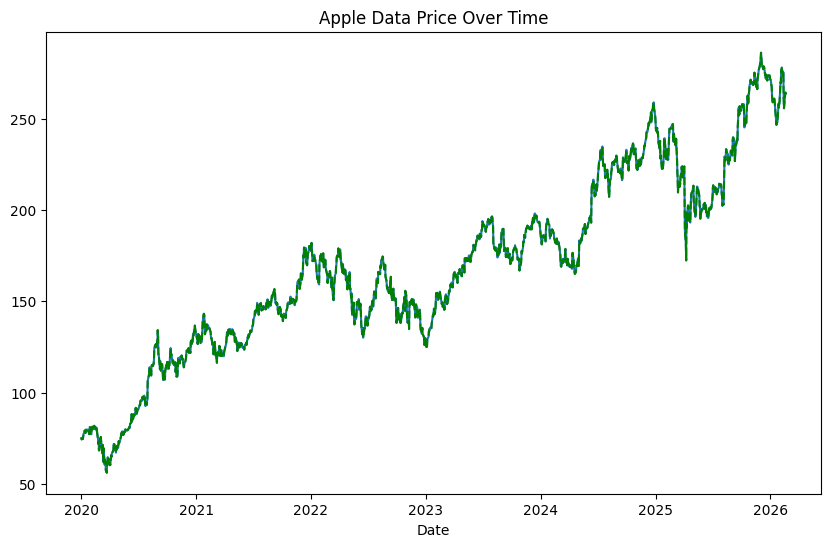

In [1039]:
plt.figure (figsize=(10,6))
plt.plot (data['Close'], label='AAPL Closing Price')
plt.title ('Apple Data Price Over Time')
plt.plot(data['Close'],'g--')
plt.xlabel ('Date')